In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client['ecommerce']

In [4]:
# Fetch data from MongoDB collections
customers = list(db['customers'].find())
orders = list(db['orders'].find())

In [5]:
# Check data
print("Customers:\n", customers)
print("\n\nOrders:\n", orders)

Customers:
 [{'_id': 1, 'name': 'Alice', 'age': 28, 'location': 'NY'}, {'_id': 2, 'name': 'Bob', 'age': 35, 'location': 'CA'}, {'_id': 3, 'name': 'Charlie', 'age': 40, 'location': 'TX'}]


Orders:
 [{'_id': ObjectId('67471a4c2a024d0d97c1c18c'), 'order_id': 1001, 'customer_id': 1, 'total': 250, 'date': '2023-10-01'}, {'_id': ObjectId('67471a4c2a024d0d97c1c18d'), 'order_id': 1002, 'customer_id': 1, 'total': 300, 'date': '2023-10-05'}, {'_id': ObjectId('67471a4c2a024d0d97c1c18e'), 'order_id': 1003, 'customer_id': 2, 'total': 500, 'date': '2023-10-10'}, {'_id': ObjectId('67471a4c2a024d0d97c1c18f'), 'order_id': 1004, 'customer_id': 3, 'total': 700, 'date': '2023-10-15'}, {'_id': ObjectId('67471a4c2a024d0d97c1c190'), 'order_id': 1005, 'customer_id': 3, 'total': 200, 'date': '2023-10-20'}]


In [6]:
# Convert MongoDB data to pandas DataFrames
customers_df = pd.DataFrame(customers)
orders_df = pd.DataFrame(orders)

In [7]:
# Merge dataframes on customer ID
merged_df = pd.merge(orders_df, customers_df, left_on="customer_id", right_on="_id", how="inner")

In [10]:
# Display the merged data
print(merged_df)

                      _id_x  order_id  customer_id  total        date  _id_y  \
0  67471a4c2a024d0d97c1c18c      1001            1    250  2023-10-01      1   
1  67471a4c2a024d0d97c1c18d      1002            1    300  2023-10-05      1   
2  67471a4c2a024d0d97c1c18e      1003            2    500  2023-10-10      2   
3  67471a4c2a024d0d97c1c18f      1004            3    700  2023-10-15      3   
4  67471a4c2a024d0d97c1c190      1005            3    200  2023-10-20      3   

      name  age location  
0    Alice   28       NY  
1    Alice   28       NY  
2      Bob   35       CA  
3  Charlie   40       TX  
4  Charlie   40       TX  


In [11]:
# Group data by customer and calculate total spending
total_spending = merged_df.groupby('name')['total'].sum().reset_index()
total_spending.columns = ['Customer', 'Total Spending']

print(total_spending)

  Customer  Total Spending
0    Alice             550
1      Bob             500
2  Charlie             900


/tmp/ipykernel_8556/773146664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer", y="Total Spending", data=total_spending, palette="viridis")


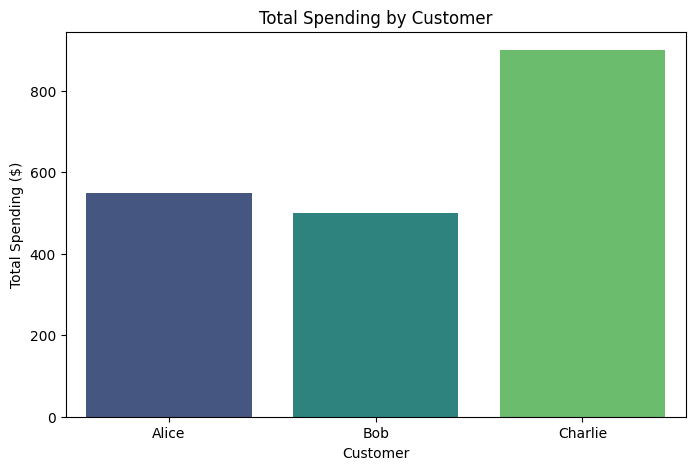

In [12]:
# Create a bar chart for Total Spending by Customer
plt.figure(figsize=(8, 5))
sns.barplot(x="Customer", y="Total Spending", data=total_spending, palette="viridis")
plt.title("Total Spending by Customer")
plt.xlabel("Customer")
plt.ylabel("Total Spending ($)")
plt.show()

In [29]:
# Calculate location spending
location_spending = merged_df.groupby('location')['total'].sum()
print(location_spending)

location
CA    500
NY    550
TX    900
Name: total, dtype: int64


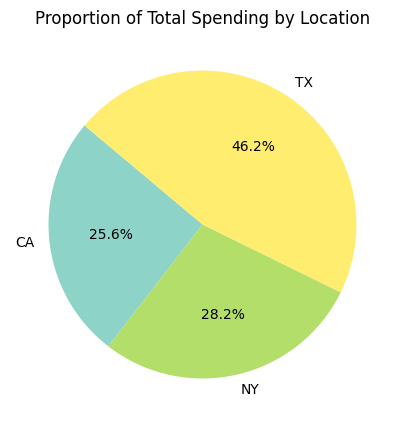

In [16]:
# Create a pie chart showing the proportion of total order amounts by customers in each location
plt.figure(figsize=(8, 5))
location_spending.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Proportion of Total Spending by Location")
plt.ylabel("")  # Remove default y-axis label
plt.show()

In [25]:
# Group data by date and sum total amounts
merged_df['date'] = pd.to_datetime(merged_df['date'])
order_trends = merged_df.groupby('date')['total'].sum().reset_index()

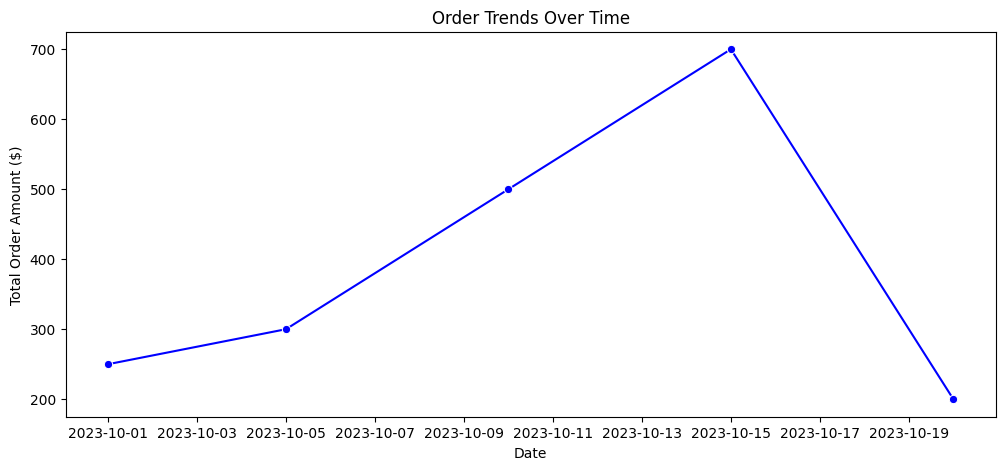

In [26]:
# Use line plot to analyse trends over time
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total', data=order_trends, marker='o', color='blue')
plt.title("Order Trends Over Time")
plt.ylabel("Total Order Amount ($)")
plt.xlabel("Date")
plt.show()